In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
import warnings

#Ignore Warnings
warnings.filterwarnings("ignore")

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#   ****Load Historical Survey Dataset****
id = '1p6WNu4LW0pJTNw9A82gvWOl9HyACTDYB' 

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Survey_Dataset.csv') 

In [ ]:
df = pd.read_csv('Survey_Dataset.csv')

In [ ]:
df.head(5)

,Time,What is your gender?,What is your age?,Enrolled Course,Field of Study,Have you used E-learning system services before?,"If your answer is Yes, what the nature of using the e-learning system services that are available at your university?",1. People who are important to me think that I should use the e-learning system,2. People who influence my behavior think that I should use the e-learning system,3. Students in my university who use the e-learning system have more effects than those who do not,...,11. Using the e-learning system saves my time.,12. Using the e-learning system enhances my efficiency.,13.I feel that the e-learning system is easy to use.,14. I feel that the e-learning system is convenient.,15. Getting the information that I want from the e-learning system is easy.,16. The e-learning system requires no training.,17.I intend to use the e-learning system in the future.,18. I would likely use the e-learning system in my daily life whenever it is possible.,19. I am planning to use the e-learning system frequently.,20. I predict that I would be using the e-learning system in the near future.
0,3/29/2020 22:58,Male,18-22 Years,Undergraduate,Faculty of Languages and Arts,No,"Access learning resources, and interact with m...",2,2,2,...,2,2,2,5,5,5,5,4,4,4
1,3/29/2020 23:00,Male,More than 30 Years,Undergraduate,Faculty of Business,Yes,"Access learning resources, and know the date a...",4,4,5,...,5,5,5,4,5,3,3,5,5,5
2,3/29/2020 23:31,Male,23-21 Years,Undergraduate,Faculty of Business,No,"Access learning resources, and interact with m...",2,1,4,...,1,1,1,1,1,2,1,1,1,1
3,3/29/2020 23:33,Male,23-21 Years,Undergraduate,Faculty of Engineering,No,Access learning resources only,1,1,1,...,1,1,4,1,1,5,3,1,1,1
4,3/29/2020 23:34,Female,23-21 Years,Undergraduate,Faculty of Languages and Arts,No,"Access learning resources, and interact with m...",1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df.columns

Index(['Time ', 'What is your gender?', 'What is your age?  ',
       'Enrolled Course', 'Field of Study',
       'Have you used E-learning system services before? ',
       'If your answer is Yes, what the nature of using the e-learning system services that are available at your university?',
       '1. People who are important to me think that I should use the e-learning system',
       '2. People who influence my behavior think that I should use the e-learning system',
       '3. Students in my university who use the e-learning system have more effects than those who do not',
       '4. Students in my university who use the e-learning system have a higher profile than those who do not',
       '5. My friends would think that I should use the e-learning system.',
       '6. My relatives would think that I should use e-learning system',
       '7. My peers would think that I should use e-learning system.',
       '8. My classmates would believe that I should use e-learning system.',
 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 27 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   Time                                                                                                                   585 non-null    object
 1   What is your gender?                                                                                                   585 non-null    object
 2   What is your age?                                                                                                      585 non-null    object
 3   Enrolled Course                                                                                                        585 non-null    object
 4   Field of

In [ ]:
df.shape

(585, 27)

In [ ]:
df.isna().sum()

Time                                                                                                                       0
What is your gender?                                                                                                       0
What is your age?                                                                                                          0
Enrolled Course                                                                                                            0
Field of Study                                                                                                             0
Have you used E-learning system services before?                                                                           0
If your answer is Yes, what the nature of using the e-learning system services that are available at your university?    111
1. People who are important to me think that I should use the e-learning system                                            0


In [ ]:
df.columns = df.columns.str.replace(' ','_')

In [ ]:
check = df[df["If_your_answer_is_Yes,_what_the_nature_of_using_the_e-learning_system_services_that_are_available_at_your_university?"].isna()]

In [ ]:
check['Have_you_used_E-learning_system_services_before?_'].value_counts()

No     110
Yes      1
Name: Have_you_used_E-learning_system_services_before?_, dtype: int64

In [ ]:
df['If_your_answer_is_Yes,_what_the_nature_of_using_the_e-learning_system_services_that_are_available_at_your_university?'].fillna('have not used any online sources', inplace=True)

In [ ]:
df.isna().sum()

Time_                                                                                                                    0
What_is_your_gender?                                                                                                     0
What_is_your_age?__                                                                                                      0
Enrolled_Course                                                                                                          0
Field_of_Study                                                                                                           0
Have_you_used_E-learning_system_services_before?_                                                                        0
If_your_answer_is_Yes,_what_the_nature_of_using_the_e-learning_system_services_that_are_available_at_your_university?    0
1._People_who_are_important_to_me_think_that_I_should_use_the_e-learning_system                                          0
2._People_who_in

In [ ]:
df.rename(columns={"Time_": "Time",
                   "What_is_your_gender?": "Gender",
                   "What_is_your_age?__": "Age",
                   "Enrolled_Course": "Course",
                   "Have_you_used_E-learning_system_services_before?_": "Used e-learning services before",
                   "If_your_answer_is_Yes,_what_the_nature_of_using_the_e-learning_system_services_that_are_available_at_your_university?": "what type of e-learning services are provided by university",
                   "9._Using_the_e-learning_system_is_useful_in_my_daily_life._": "How useful it is",
                   "10._Using_the_e-learning_system_increases_my_productivity.": "Increases productivity",
                   "11._Using_the_e-learning_system_saves_my_time.": "Saves time",
                   "12._Using_the_e-learning_system_enhances_my_efficiency.": "Efficient",
                   "13.I_feel_that_the_e-learning_system_is_easy_to_use.": "Easy",
                   "14._I_feel_that_the_e-learning_system_is_convenient.": "Convenient",
                   "15._Getting_the_information_that_I_want_from_the_e-learning_system_is_easy.": "Easy to gather information using it",
                   "16._The_e-learning_system_requires_no_training.": "Requires training",
                   "17.I_intend_to_use_the_e-learning_system_in_the_future.": "Will you use it in future",
                   "18._I_would_likely_use_the_e-learning_system_in_my_daily_life_whenever_it_is_possible.": "How likely you would be using it in your daily life",
                   "19._I_am_planning_to_use_the_e-learning_system_frequently.": "Frequent use",
                   "20._I_predict_that_I_would_be_using_the_e-learning_system_in_the_near_future._": "Predict how much you will be using it in future"}, errors="raise",inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 27 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   Time                                                                                                    585 non-null    object
 1   Gender                                                                                                  585 non-null    object
 2   Age                                                                                                     585 non-null    object
 3   Course                                                                                                  585 non-null    object
 4   Field_of_Study                                                                                    

In [ ]:
df.drop(['1._People_who_are_important_to_me_think_that_I_should_use_the_e-learning_system','2._People_who_influence_my_behavior_think_that_I_should_use_the_e-learning_system','3._Students_in_my_university_who_use_the_e-learning_system_have_more_effects_than_those_who_do_not','4._Students_in_my_university_who_use_the_e-learning_system_have_a_higher_profile_than_those_who_do_not','5._My_friends_would_think_that_I_should_use_the_e-learning_system.','6._My_relatives_would_think_that_I_should_use_e-learning_system','7._My_peers_would_think_that_I_should_use_e-learning_system.','8._My_classmates_would_believe_that_I_should_use_e-learning_system.'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 19 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Time                                                         585 non-null    object
 1   Gender                                                       585 non-null    object
 2   Age                                                          585 non-null    object
 3   Course                                                       585 non-null    object
 4   Field_of_Study                                               585 non-null    object
 5   Used e-learning services before                              585 non-null    object
 6   what type of e-learning services are provided by university  585 non-null    object
 7   How useful it is                                             585 non-null    int64 
 8   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 19 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Time                                                         585 non-null    object
 1   Gender                                                       585 non-null    object
 2   Age                                                          585 non-null    object
 3   Course                                                       585 non-null    object
 4   Field_of_Study                                               585 non-null    object
 5   Used e-learning services before                              585 non-null    object
 6   what type of e-learning services are provided by university  585 non-null    object
 7   How useful it is                                             585 non-null    int64 
 8   

In [ ]:
df.columns = df.columns.str.replace('_',' ')

In [ ]:
df['Age'].value_counts()

23-21 Years            309
20-18 Years            146
30-24 Years            100
More than 30 Years      27
18-22 Years              1
23-21                    1
more than 30 Years       1
Name: Age, dtype: int64

In [ ]:
df['Age'] = df['Age'].str.replace('23-21 ','23-21 Years')
df['Age'] = df['Age'].str.replace('23-21 YearsYears ','23-21 Years')
df['Age'] = df['Age'].str.replace('more than 30 Years ','More than 30 Years ')

In [ ]:
"""
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'Spending Score--->'),zaxis = dict(title  = 'Annual Income-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()"""

"\n# 3d scatterplot using plotly\nScene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'Spending Score--->'),zaxis = dict(title  = 'Annual Income-->'))\n\n# model.labels_ is nothing but the predicted clusters i.e y_clusters\nlabels = model.labels_\ntrace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))\nlayout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)\ndata = [trace]\nfig = go.Figure(data = data, layout = layout)\nfig.show()"

In [ ]:
df.head()

,Time,Gender,Age,Course,Field of Study,Used e-learning services before,what type of e-learning services are provided by university,How useful it is,Increases productivity,Saves time,Efficient,Easy,Convenient,Easy to gather information using it,Requires training,Will you use it in future,How likely you would be using it in your daily life,Frequent use,Predict how much you will be using it in future
0,3/29/2020 22:58,Male,18-22 Years,Undergraduate,Faculty of Languages and Arts,No,"Access learning resources, and interact with m...",2,2,2,2,2,5,5,5,5,4,4,4
1,3/29/2020 23:00,Male,More than 30 Years,Undergraduate,Faculty of Business,Yes,"Access learning resources, and know the date a...",5,5,5,5,5,4,5,3,3,5,5,5
2,3/29/2020 23:31,Male,23-21 Years,Undergraduate,Faculty of Business,No,"Access learning resources, and interact with m...",1,1,1,1,1,1,1,2,1,1,1,1
3,3/29/2020 23:33,Male,23-21 Years,Undergraduate,Faculty of Engineering,No,Access learning resources only,1,1,1,1,4,1,1,5,3,1,1,1
4,3/29/2020 23:34,Female,23-21 Years,Undergraduate,Faculty of Languages and Arts,No,"Access learning resources, and interact with m...",1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df['Field of Study'] = df['Field of Study'].replace('Faculty of ', '', regex=True)

In [ ]:
df['Field of Study'] = df['Field of Study'].replace({'Educational Sciences': 'Education'})
df['Field of Study'] = df['Field of Study'].replace({'Pharmacy': 'Health & Sciences'})
df['Field of Study'] = df['Field of Study'].replace({'Science and Information Technology': 'Information Technology'})

In [5]:
df.to_csv('history_cleaned.csv')

NameError: ignored

In [8]:
df = pd.read_csv('history_cleaned.csv')

In [10]:
df.drop(['Unnamed: 0','what type of e-learning services are provided by university','Age'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Time                                                 585 non-null    object
 1   Gender                                               585 non-null    object
 2   Course                                               585 non-null    object
 3   Field of Study                                       585 non-null    object
 4   Used e-learning services before                      585 non-null    object
 5   How useful it is                                     585 non-null    int64 
 6   Increases productivity                               585 non-null    int64 
 7   Saves time                                           585 non-null    int64 
 8   Efficient                                            585 non-null    int64 
 9  

In [11]:
df.head()

,Time,Gender,Course,Field of Study,Used e-learning services before,How useful it is,Increases productivity,Saves time,Efficient,Easy,Convenient,Easy to gather information using it,Requires training,Will you use it in future,How likely you would be using it in your daily life,Frequent use,Predict how much you will be using it in future
0,3/29/2020 22:58,Male,Undergraduate,Languages and Arts,No,2,2,2,2,2,5,5,5,5,4,4,4
1,3/29/2020 23:00,Male,Undergraduate,Business,Yes,5,5,5,5,5,4,5,3,3,5,5,5
2,3/29/2020 23:31,Male,Undergraduate,Business,No,1,1,1,1,1,1,1,2,1,1,1,1
3,3/29/2020 23:33,Male,Undergraduate,Engineering,No,1,1,1,1,4,1,1,5,3,1,1,1
4,3/29/2020 23:34,Female,Undergraduate,Languages and Arts,No,1,1,1,1,1,1,1,1,1,1,1,1


---

## Karnik

---

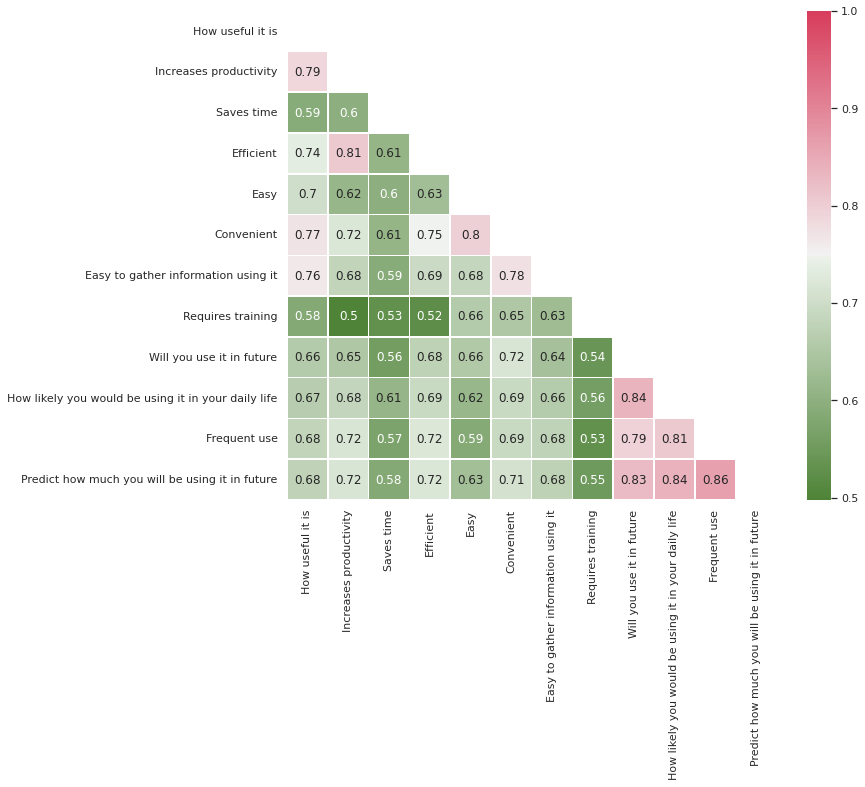

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(120, 5, as_cmap=True)
sns.set_theme(style="white")
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=1, center=0.75,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

1.   Frequent use and Predict how much you will be using it in future columns have the highest correlation value which is **0.86**
2.   Predict how much you will be using it in future equally correlated with How likely you would be using it in your daily life and Will you use it in future at around **0.84**




In [ ]:
df1 = df[['Will you use it in future','How likely you would be using it in your daily life','Frequent use','Easy to gather information using it','Predict how much you will be using it in future']].copy()
df1.head()

,Will you use it in future,How likely you would be using it in your daily life,Frequent use,Easy to gather information using it,Predict how much you will be using it in future
0,5,4,4,5,4
1,3,5,5,5,5
2,1,1,1,1,1
3,3,1,1,1,1
4,1,1,1,1,1


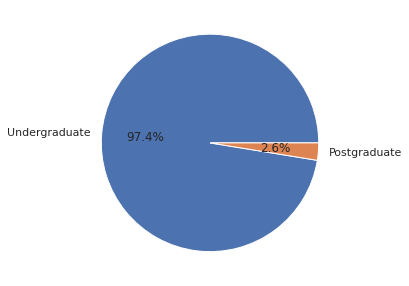

In [ ]:
df['Course'].value_counts().plot.pie(autopct="%.1f%%", figsize=(5, 5), ylabel='')

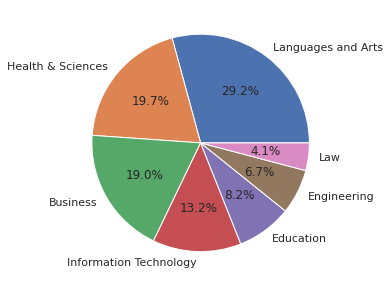

In [ ]:
df['Field of Study'].value_counts().plot.pie(autopct="%.1f%%", figsize=(5, 5), ylabel='')

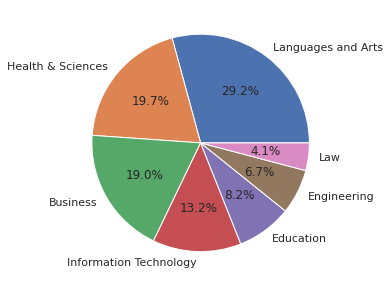

In [ ]:
df['Field of Study'].value_counts().plot.pie(autopct="%.1f%%", figsize=(5, 5), ylabel='')

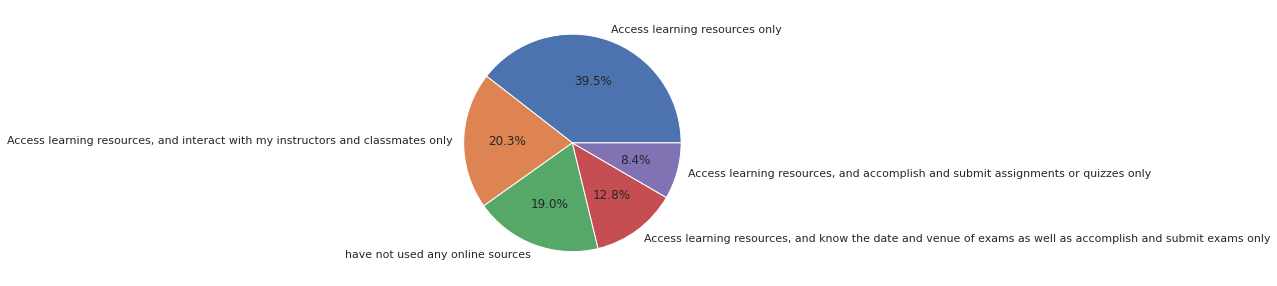

In [ ]:
df['what type of e-learning services are provided by university'].value_counts().plot.pie(autopct="%.1f%%", figsize=(5, 5), ylabel='')

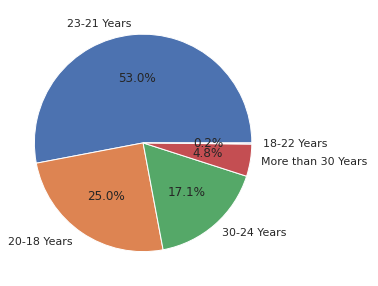

In [ ]:
df['Age'].value_counts().plot.pie(autopct="%.1f%%", figsize=(5, 5), ylabel='')

In [ ]:
df2 = df.select_dtypes(exclude='object')
df2.head()

,How useful it is,Increases productivity,Saves time,Efficient,Easy,Convenient,Easy to gather information using it,Requires training,Will you use it in future,How likely you would be using it in your daily life,Frequent use,Predict how much you will be using it in future
0,2,2,2,2,2,5,5,5,5,4,4,4
1,5,5,5,5,5,4,5,3,3,5,5,5
2,1,1,1,1,1,1,1,2,1,1,1,1
3,1,1,1,1,4,1,1,5,3,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1


---

## Jay

---

In [ ]:
#  collectn_1 = df.Easy
# collectn_2 = df.Efficient
# collection_3 = df.Convenient
  
# ## combine these different collections into a list
# data_to_plot = [collectn_1, collectn_2,collection_3]

# # Create a figure instance
# fig = plt.figure()

# # Create an axes instance
# ax = fig.add_axes([0,0,1,1])
# xlabel=np.array('Easy','','Efficient','','Convenient')
# # Create the boxplot
# bp = ax.violinplot(data_to_plot)
# ax.xaxis.set_ticks(xlabel)
# plt.show()

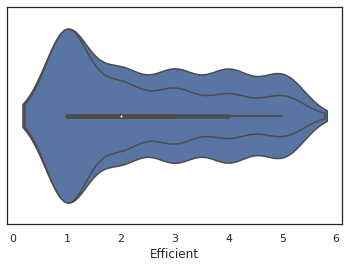

In [ ]:
sns.violinplot(df['Easy'])
sns.violinplot(df['Efficient'])

---

## Sonali

---

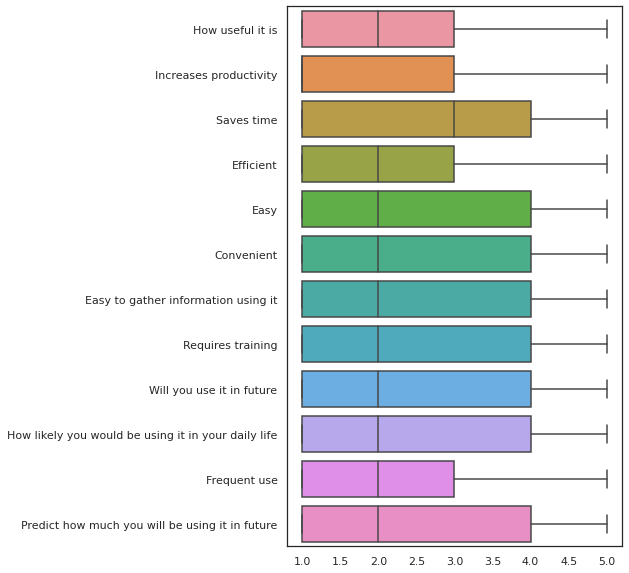

In [ ]:
sns.boxplot(data=df, orient='h')
plt.subplots_adjust(top = 2)

In [ ]:
df_sample = df[['How useful it is','Increases productivity','Saves time','Easy','Predict how much you will be using it in future','Course']]

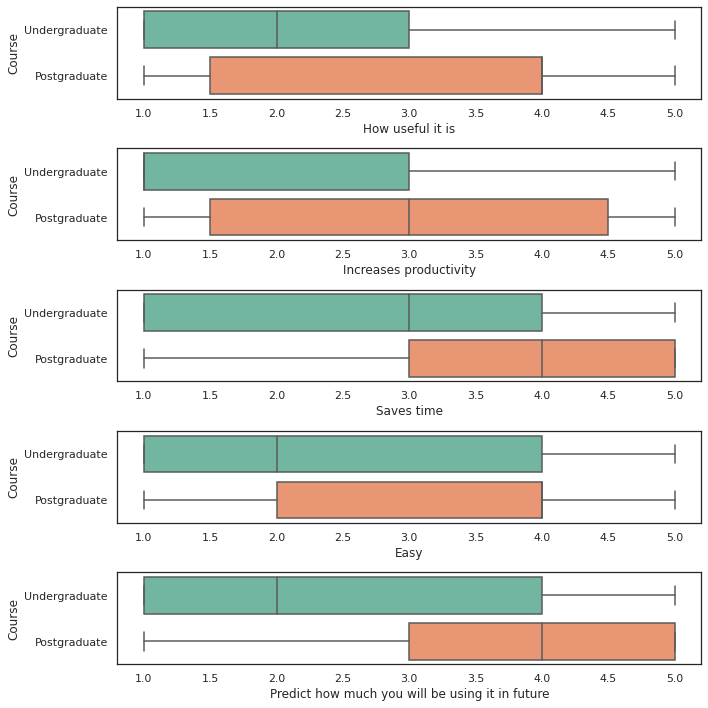

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 10), sharex=False, sharey=False, squeeze=False, subplot_kw=None, gridspec_kw=None)

'''sns.set(font_scale=1)'''

sns.boxplot(data=df_sample, x='How useful it is', y='Course', ax=axes[0,0], palette='Set2')
sns.boxplot(data=df_sample, x='Increases productivity', y='Course', ax=axes[1,0], palette='Set2')
sns.boxplot(data=df_sample, x='Saves time', y='Course', ax=axes[2,0], palette='Set2')
sns.boxplot(data=df_sample, x='Easy', y='Course', ax=axes[3,0], palette='Set2')
sns.boxplot(data=df_sample, x='Predict how much you will be using it in future', y='Course', ax=axes[4,0], palette='Set2')

plt.tight_layout();

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_sample, x='How useful it is', y='Increases productivity', z='Saves time',
                    color='Course')
fig.show(figsize=(30, 30))

In [ ]:
df.Course.value_counts()

Undergraduate    570
Postgraduate      15
Name: Course, dtype: int64

---

# Survey Dataset

---

In [ ]:
#   ****Load Live Survey Dataset****
id = '1vg6S9ukRRm948mCWn0-nBNth_4Cws1KD' 

survey = drive.CreateFile({'id':id}) 
survey.GetContentFile('Survey.csv') 

In [ ]:
df_survey = pd.read_csv('Survey.csv')

In [ ]:
df_survey.head()

,Timestamp,1. Have you taken any online classes post covid?,Choose your Field of Study,What is your Age-group?,2. What is your current student status?,3. Are you an International Student?,4. How effective is online education as compared to in-person?,5. My learning has decreased after studying online,6. I miss the classroom experience,7. I do not miss the commute to classes,8. I get more distracted during remote learning,9. It is easier to follow the instructor in-person,9. Do you want to suggest or give your opinion? Appreciate it!
0,2022/10/28 9:48:54 PM PDT,No,Information Technology,24-30 Years,Postgraduate,Yes,Very Effective,Neutral,Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN
1,2022/11/04 11:31:43 AM PDT,Yes,Health & Sciences,18-20 Years,Undergraduate,No,Very Effective,Disagree,Strongly Disagree,Strongly Agree,Agree,Neutral,NaN
2,2022/11/04 12:23:52 PM PDT,Yes,Business,18-20 Years,Undergraduate,No,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Online learning can be very effective. I think...
3,2022/11/04 2:48:20 PM PDT,Yes,Health & Sciences,24-30 Years,Undergraduate,Yes,Somewhat Effective,Neutral,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,NaN
4,2022/11/04 2:56:17 PM PDT,Yes,Education,24-30 Years,Postgraduate,No,Extremely Effective,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,NaN


In [ ]:
df_survey.isna().sum()

Timestamp                                                           0
1. Have you taken any online classes post covid?                    0
Choose your Field of Study                                          0
What is your Age-group?                                             0
2. What is your current student status?                             0
3. Are you an International Student?                                0
4. How effective is online education as compared to in-person?      0
5. My learning has decreased after studying online                  0
6. I miss the classroom experience                                  0
7. I do not miss the commute to classes                             0
8. I get more distracted during remote learning                     0
9. It is easier to follow the instructor in-person                  0
9. Do you want to suggest or give your opinion? Appreciate it!     73
dtype: int64

In [ ]:
df_survey.columns = df_survey.columns.str.replace(' ','_')

In [ ]:
df_survey.drop(columns='Timestamp', axis=1, inplace=True)

In [ ]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   1._Have_you_taken_any_online_classes_post_covid?                 105 non-null    object
 1   Choose_your_Field_of_Study                                       105 non-null    object
 2   What_is_your_Age-group?                                          105 non-null    object
 3   2._What_is_your_current_student_status?                          105 non-null    object
 4   3._Are_you_an_International_Student?                             105 non-null    object
 5   4._How_effective_is_online_education_as_compared_to_in-person?   105 non-null    object
 6   5._My_learning_has_decreased_after_studying_online               105 non-null    object
 7   6._I_miss_the_classroom_experience                   

In [ ]:
df_survey.rename(columns={"1._Have_you_taken_any_online_classes_post_covid?": "Taken classes",
                   "Choose_your_Field_of_Study": "Field of study",
                   "What_is_your_Age-group?": "Age-Group",
                   "2._What_is_your_current_student_status?": "Current status",
                   "3._Are_you_an_International_Student?": "International students",
                   "4._How_effective_is_online_education_as_compared_to_in-person?": "Effective",
                   "5._My_learning_has_decreased_after_studying_online": "Learning rate",
                   "6._I_miss_the_classroom_experience": "Miss classroom exp",
                   "7._I_do_not_miss_the_commute_to_classes": "Miss commute to class",
                   "8._I_get_more_distracted_during_remote_learning": "Distraction during online class",
                   "9._It_is_easier_to_follow_the_instructor_in-person": "Easy",
                   "9._Do_you_want_to_suggest_or_give_your_opinion?_Appreciate_it!_": "Opinion"}, errors="raise",inplace=True)


In [ ]:
df_survey.head()

,Taken classes,Field of study,Age-Group,Current status,International students,Effective,Learning rate,Miss classroom exp,Miss commute to class,Distraction during online class,Easy,Opinion
0,No,Information Technology,24-30 Years,Postgraduate,Yes,Very Effective,Neutral,Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN
1,Yes,Health & Sciences,18-20 Years,Undergraduate,No,Very Effective,Disagree,Strongly Disagree,Strongly Agree,Agree,Neutral,NaN
2,Yes,Business,18-20 Years,Undergraduate,No,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Online learning can be very effective. I think...
3,Yes,Health & Sciences,24-30 Years,Undergraduate,Yes,Somewhat Effective,Neutral,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,NaN
4,Yes,Education,24-30 Years,Postgraduate,No,Extremely Effective,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,NaN


In [ ]:
df_word = df_survey.loc[df_survey['Opinion'].notnull()]

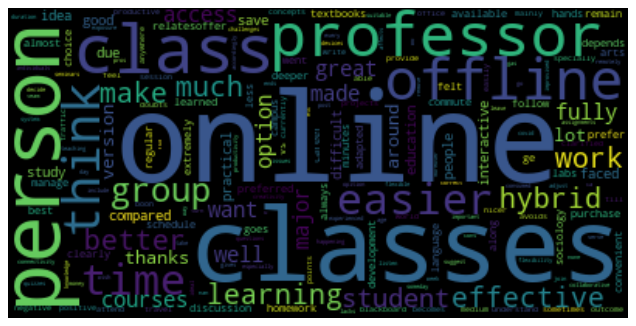

In [ ]:
stop = stopwords.words('english')
# stop.append('No')
review=list(df_word['Opinion'])
clean=[]
for text in review:
#   #Toknize String
  text = re.sub(r'[0-9]', '_', str(text))
  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

# join the list and lowercase all the words
text = ' '.join(clean).lower()

#create the wordcloud object
wordcloud = WordCloud(
                      collocations=True).generate(text)

#plot the wordcloud object
plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

---

# HeatMap for Live Survey Data

---

In [ ]:
df_survey_enc = df_survey.copy()

In [ ]:
values = {'Strongly Disagree': 1, 'Disagree': 2,'Neutral': 3,'Agree': 4, 'Strongly Agree': 5}
columns = ['Learning rate','Miss classroom exp','Miss commute to class','Distraction during online class','Easy']

for col in columns:
    df_survey_enc[col] = df_survey_enc[col].map(values)

df_survey_enc['Effective'] = df_survey_enc['Effective'].map({'Not Effective': 1, 'Neutral': 2,'Somewhat Effective': 3,'Very Effective': 4, 'Extremely Effective': 5})
df_survey_enc['Taken classes'] = df_survey_enc['Taken classes'].map({'Yes': 1, 'No':2})
df_survey_enc['International students'] = df_survey_enc['International students'].map({'Yes': 1, 'No': 0})
df_survey_enc['Current status'] = df_survey_enc['Current status'].map({'Postgraduate': 2, 'Undergraduate': 1})
df_survey_enc['Field of study'] = df_survey_enc['Field of study'].map({'Information Technology': 1, 'Engineering': 2,'Health & Sciences': 3,'Business': 4, 'Education': 5,'Language and Arts': 6, 'Law':7})

In [ ]:
df_survey_enc.head()

,Taken classes,Field of study,Age-Group,Current status,International students,Effective,Learning rate,Miss classroom exp,Miss commute to class,Distraction during online class,Easy,Opinion
0,2,1,24-30 Years,2,1,4,3,4,5,5,5,NaN
1,1,3,18-20 Years,1,0,4,2,1,5,4,3,NaN
2,1,4,18-20 Years,1,0,2,2,4,5,5,5,Online learning can be very effective. I think...
3,1,3,24-30 Years,1,1,3,3,3,5,5,5,NaN
4,1,5,24-30 Years,2,0,5,1,1,5,1,1,NaN


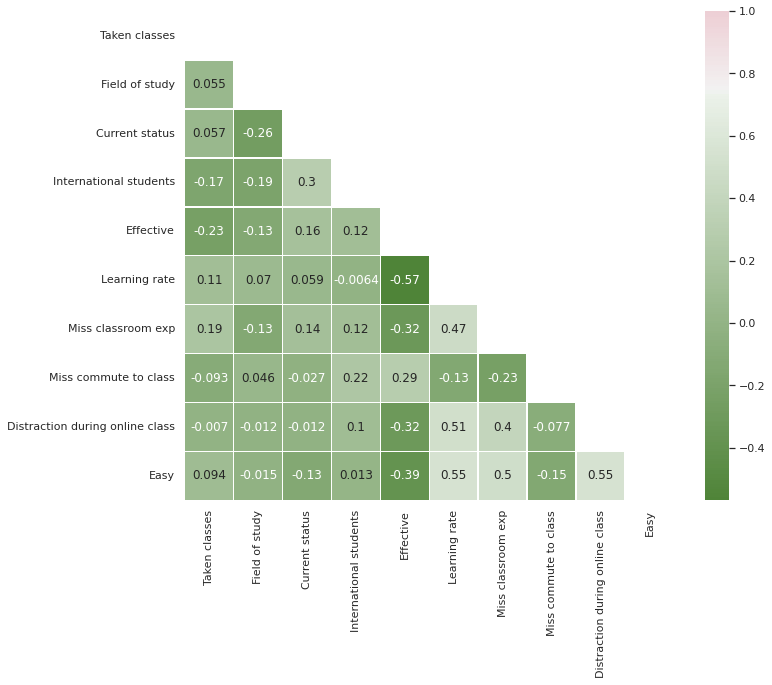

In [ ]:
df1 = df_survey_enc.drop(columns='Opinion')
corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(120, 5, as_cmap=True)
sns.set_theme(style="white")
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=1, center=0.75, square=True, linewidths=.5, cbar_kws={"shrink": 1})